In [58]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import folium
from geopy.geocoders import Nominatim
from folium.plugins import HeatMap
from folium import plugins
import sqlite3
import csv

In [2]:
sales = pd.read_csv("Sample-Superstore.csv")
df = sales

In [116]:
Cat = pd.read_csv("Cat.csv")
Category = Cat
Pro = pd.read_csv("Pro.csv")
Product = Pro
Custos = pd.read_csv("Custos.csv")
Customer = Custos
Ords = pd.read_csv("Ords.csv")
Orders = Ords
Odetails = pd.read_csv("Odetails.csv")
Order_Details = Odetails

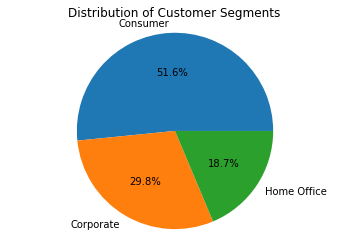

In [12]:
segment_counts = Customer['Segment'].value_counts()
plt.pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Customer Segments')
plt.axis('equal')
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [14]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])
print(df.dtypes)

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object


In [117]:
Orders

,OrderID,CustomerID,OrderDate,AdressID,ShipDate,ShipMode
0,CA-2016-152156,CG-12520,11/8/2016,439,11/11/2016,Second Class
1,CA-2016-138688,DV-13045,6/12/2016,557,6/16/2016,Second Class
2,US-2015-108966,SO-20335,10/11/2015,569,10/18/2015,Standard Class
3,CA-2014-115812,BH-11710,6/9/2014,623,6/14/2014,Standard Class
4,CA-2017-114412,AA-10480,4/15/2017,523,4/20/2017,Standard Class
...,...,...,...,...,...,...
5004,CA-2016-125794,ML-17410,9/29/2016,628,10/3/2016,Standard Class
5005,CA-2017-163629,RA-19885,11/17/2017,629,11/21/2017,Standard Class
5006,CA-2014-110422,TB-21400,1/21/2014,630,1/23/2014,Second Class
5007,CA-2017-121258,DB-13060,2/26/2017,631,3/3/2017,Standard Class


In [118]:
Odetails

,OrderID,ODKey,ProductID,Quantity,Sales,Discount,Profit
0,CA-2016-152156,1,1,2,261.9600,0.00,41.9136
1,CA-2016-152156,2,2,3,731.9400,0.00,219.5820
2,CA-2016-138688,3,3,2,14.6200,0.00,6.8714
3,US-2015-108966,4,4,5,957.5775,0.45,-383.0310
4,US-2015-108966,5,5,2,22.3680,0.20,2.5164
...,...,...,...,...,...,...,...
9981,CA-2014-110422,9982,1159,3,25.2480,0.20,4.1028
9982,CA-2017-121258,9983,1752,2,91.9600,0.00,15.6332
9983,CA-2017-121258,9984,298,2,258.5760,0.20,19.3932
9984,CA-2017-121258,9985,950,4,29.6000,0.00,13.3200


In [128]:
result = pd.merge(Odetails, Orders, how="left", on=["OrderID"])

In [129]:
result

,OrderID,ODKey,ProductID,Quantity,Sales,Discount,Profit,CustomerID,OrderDate,AdressID,ShipDate,ShipMode
0,CA-2016-152156,1,1,2,261.9600,0.00,41.9136,CG-12520,11/8/2016,439,11/11/2016,Second Class
1,CA-2016-152156,2,2,3,731.9400,0.00,219.5820,CG-12520,11/8/2016,439,11/11/2016,Second Class
2,CA-2016-138688,3,3,2,14.6200,0.00,6.8714,DV-13045,6/12/2016,557,6/16/2016,Second Class
3,US-2015-108966,4,4,5,957.5775,0.45,-383.0310,SO-20335,10/11/2015,569,10/18/2015,Standard Class
4,US-2015-108966,5,5,2,22.3680,0.20,2.5164,SO-20335,10/11/2015,569,10/18/2015,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...
9981,CA-2014-110422,9982,1159,3,25.2480,0.20,4.1028,TB-21400,1/21/2014,630,1/23/2014,Second Class
9982,CA-2017-121258,9983,1752,2,91.9600,0.00,15.6332,DB-13060,2/26/2017,631,3/3/2017,Standard Class
9983,CA-2017-121258,9984,298,2,258.5760,0.20,19.3932,DB-13060,2/26/2017,631,3/3/2017,Standard Class
9984,CA-2017-121258,9985,950,4,29.6000,0.00,13.3200,DB-13060,2/26/2017,631,3/3/2017,Standard Class


In [131]:
result = pd.merge(result, Product, how="left", on=["ProductID"])

In [136]:
result = pd.merge(result, Customer, how="left", on=["CustomerID"])

In [137]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9986 entries, 0 to 9985
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   OrderID         9986 non-null   object        
 1   ODKey           9986 non-null   int64         
 2   ProductID       9986 non-null   int64         
 3   Quantity        9986 non-null   int64         
 4   Sales           9986 non-null   float64       
 5   Discount        9986 non-null   float64       
 6   Profit          9986 non-null   float64       
 7   CustomerID      9986 non-null   object        
 8   OrderDate       9986 non-null   datetime64[ns]
 9   AdressID        9986 non-null   int64         
 10  ShipDate        9986 non-null   datetime64[ns]
 11  ShipMode        9986 non-null   object        
 12  CategoryID      9986 non-null   int64         
 13  SupplierPrice   9986 non-null   float64       
 14  CataloguePrice  9986 non-null   float64       
 15  Prod

In [138]:
result["OrderDate"] = pd.to_datetime(result["OrderDate"])
result["ShipDate"] = pd.to_datetime(result["ShipDate"])
print(result.dtypes)

OrderID                   object
ODKey                      int64
ProductID                  int64
Quantity                   int64
Sales                    float64
Discount                 float64
Profit                   float64
CustomerID                object
OrderDate         datetime64[ns]
AdressID                   int64
ShipDate          datetime64[ns]
ShipMode                  object
CategoryID                 int64
SupplierPrice            float64
CataloguePrice           float64
ProductName               object
CustomerName              object
Segment                   object
dtype: object


In [158]:
res1 = result.groupby(['CategoryID', 'Segment'])['Sales'].sum().reset_index()
res1.head()

,CategoryID,Segment,Sales
0,1,Consumer,68632.7290
1,1,Corporate,34005.9243
2,1,Home Office,12241.3430
3,2,Consumer,172862.7420
4,2,Corporate,99140.8780


[Text(0.5, 1.0, 'xxx')]

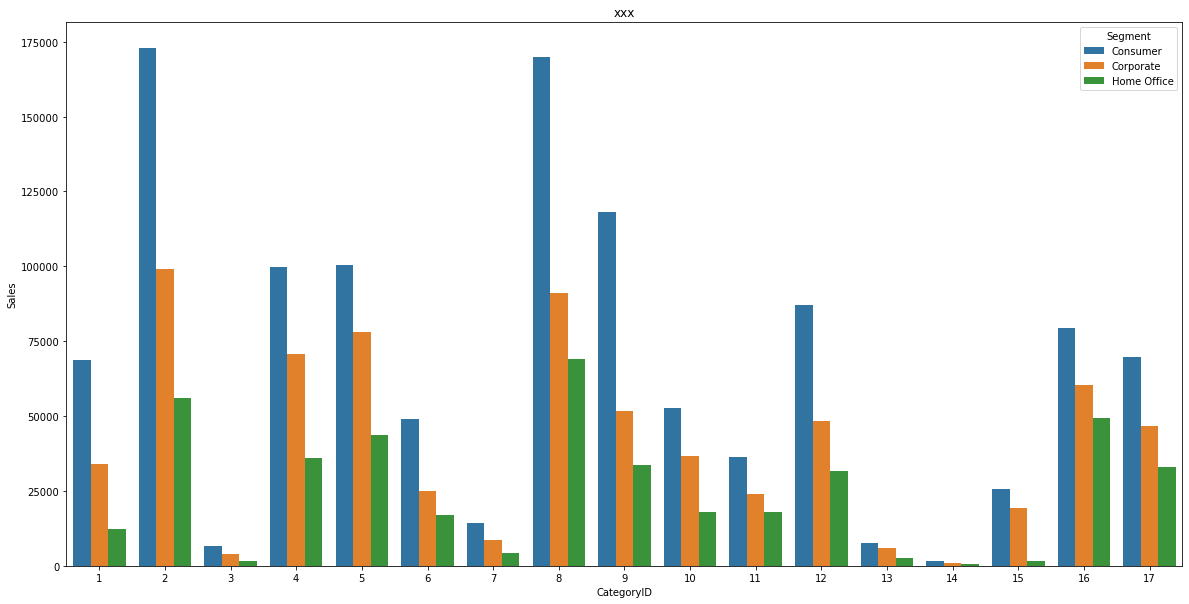

In [181]:
fig,ax = plt.subplots(figsize=(20,10))
sns.barplot(data=res1[['CategoryID', 'Sales', 'Segment']],
              x='CategoryID',
              y='Sales',
              hue='Segment',
              ax=ax
              )
ax.set(title="xxx")